# Intro to statistics Python

https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python

## 1 Summary Statistics

### Measures of centre

* mean (average)
* median - 50% lower, 50% higher
* mode - most frequent


In [28]:
import numpy as np
import statistics as st
import pandas as pd

columns = ['A','B']
data = np.array([[1,2] , [1,5] , [2,3], [2,4], [2,5], [2,1], [3,6], [3,3], [3,5], [2,5], [7,1], [2,2], [3,3], [1,6], [4,2], [10, 2], [15, 15], [11,3], [5, 13]])
df = pd.DataFrame(data,columns=columns)
#print(df) 

# mean
print("mean of column", df.columns[0], "is", np.mean(df['A']))

# median
print("median of column", df.columns[1], "is", np.median(df.loc[1]))

# mode
print("mode of A:", st.mode(df['A']))

# combined
print(df['A'].agg([np.mean, np.median]))


mean of column A is 4.157894736842105
median of column B is 3.0
mode of A: 2
mean      4.157895
median    3.000000
Name: A, dtype: float64


To get all rows of df where the col_name column is 'a', use `df[df['col_name'] == 'a']`



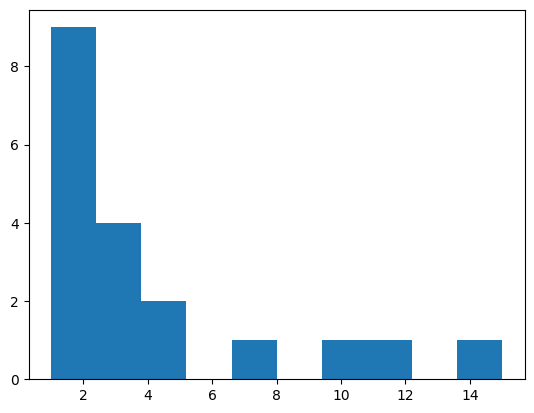

In [29]:
# plot a histogram

import matplotlib.pyplot as plt
plt.hist(df['A'])
plt.show()

### measures of spread

`variance` - average distance from each data point to the data's mean

1. subtract mean from each data point
2. square each distance 
3. sum squared distances
4. divide by n

```py

# variance
# ddof = 1 where sample is used; if it is an entire population, then use omit ddof=1
np.var(df['col_name'], ddof=1)

```

`stanard deviation` - square root of variance

```py
# sq root of variance
np.sqrt(np.var(df['col_name'], ddof=1))

# one step
np.std(df['col_name'], ddof=1)
```

`mean absolute deviation` - absolute value of the distances to mean, then mean of the differences

```py
dists = df['col'] - mean(df$col)
np.mean(np.abs(dists))
```

**different to standard deviation**
* SD squares distances, penalising longer distances more than shorter
* MAD penalises all distances equally
* SD is more common


#### quantiles

* split data into number of equal parts
* 
```py

np.quantile(df['A'], 0.5)
```
#### boxplots

* represent quartiles
* box is 50% (25%, median, 75%)

`interquartile range (IQR)` - height of the box in a boxplot, 25%-75%

```py
# using numpy
np.quantile([df['A'], 0.75) - np.quantile(df['A'], 0.25)

# using scipy

from scipy.stats import iqr
iqr(df['A'])

```

[ 1.   2.   3.   4.5 15. ]
[ 1.   2.   3.   4.5 15. ]


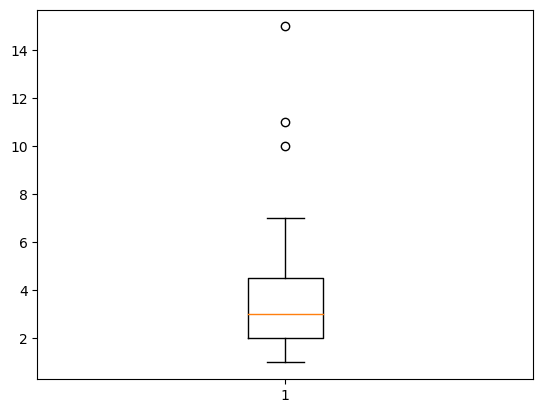

In [34]:

# quartiles - 4 equal parts
print(np.quantile(df['A'], [0, 0.25, 0.5, 0.75, 1]))

# linspace - to split quartiles into equal parts
print(np.quantile((df['A']), np.linspace(0, 1, 5)))

plt.boxplot(df['A'])
plt.show()


#### Outliers

* data substantially different from other data points
* standard: 
  * data < Q1 - 1.5 * IQR 
  * data > Q3 + 1.5 * IQR

In [42]:
from scipy.stats import iqr

iqr = iqr(df['A'])
print(iqr)

lower_bound = np.quantile(df['A'], 0.25) - (1.5 * iqr)
upper_bound = np.quantile(df['A'], 0.75) + (1.5 * iqr)

print(lower_bound, upper_bound)

print(df['A'].loc[df['A'] > upper_bound])
print(df['A'].loc[df['A'] < lower_bound])

print(df[(df['A'] > upper_bound)|(df['A'] < lower_bound)])

2.5
-1.75 8.25
15    10
16    15
17    11
Name: A, dtype: int32
Series([], Name: A, dtype: int32)
     A   B
15  10   2
16  15  15
17  11   3


In [43]:
# all in one

df.describe()

,A,B
count,19.000000,19.000000
mean,4.157895,4.526316
std,3.876756,3.702378
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.500000,5.000000
max,15.000000,15.000000


## 2 Random Numbers and Probability

P(event) = # ways event can happen / total # of possible outcomes

```py
# sampling from dataframe

df.sample()

# setting seed

np.random.seed(10)
```

**setting seed**

np.random.seed(100)

**sampling with / without replacement**
* pull sample 5x returning/replacing each time
df.sample(5, replace=True)

**independence** - second event not affected by outcome of first event

* sampling without replacement = each pick is dependent because second pick outcome affected by what happens in first

**probability distribution** - probability of each possible outcome in a scenario
**expected value** mean of a probability distribution
* multiply each value by its probaility and summing

**probability** of different outcomes is the area of the probability distribution

**discrete probability distribution** - discrete outcomes
* same outcome probability = discrete uniform distribution



   number      prob
0       1  0.166667
1       2  0.166667
2       3  0.166667
3       4  0.166667
4       5  0.166667
5       6  0.166667
3.5
   number      prob
2       3  0.166667
4       5  0.166667
0       1  0.166667
1       2  0.166667
0       1  0.166667
0       1  0.166667
1       2  0.166667
2       3  0.166667
2       3  0.166667
3       4  0.166667


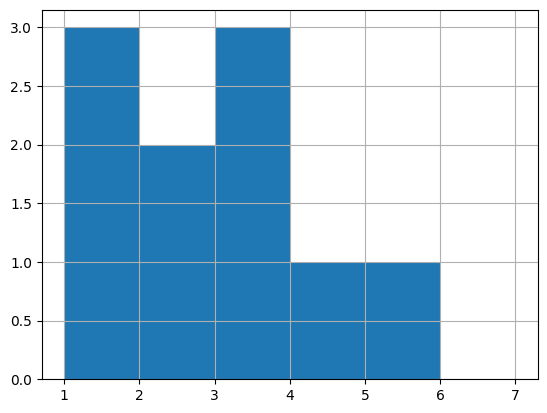

2.5


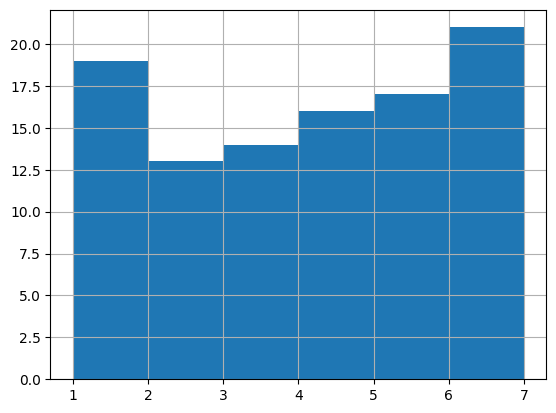

3.62


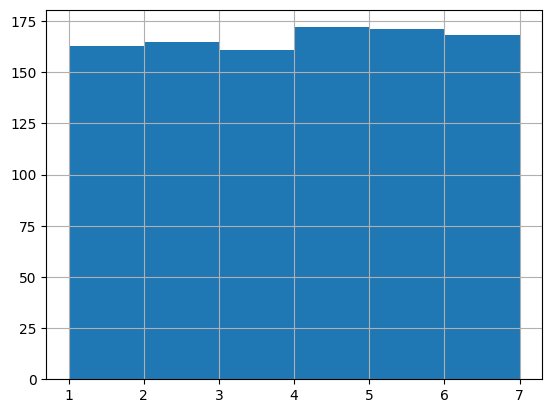

3.527


In [11]:
# visualising a sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set seed
np.random.seed(1)

die = pd.DataFrame({
    'number': [1, 2, 3, 4, 5, 6],
    'prob': [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667]
})
print(die)
# mean
print(np.mean(die['number']))

# sample 10 rolls
rolls_10 = die.sample(10, replace=True, weights='prob')
print(rolls_10)

# plot histogram
rolls_10['number'].hist(bins=np.linspace(1,7,7))
plt.show()

# means (theoretical is 3.5)
print(np.mean(rolls_10['number']))

# sample 100 rolls
rolls_100 = die.sample(100, replace=True, weights='prob')
rolls_100['number'].hist(bins=np.linspace(1,7,7))
plt.show()
print(np.mean(rolls_100['number']))

# sample 1000 rolls
rolls_1000 = die.sample(1000, replace=True, weights='prob')
rolls_1000['number'].hist(bins=np.linspace(1,7,7))
plt.show()
print(np.mean(rolls_1000['number']))


**Law of large numbers** - as size of sample increases, sample mean will approach expected value

In [ ]:
# example

# Create probability distribution
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()

# or 
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

print(expected_value)

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

**continuous variables**

In [5]:
# uniform distribution in python
from scipy.stats import uniform
uniform.cdf(7, 0, 12) # 7 is the value, 0 is the lower bound, 12 is the upper bound

more_than_7 = 1- uniform.cdf(7, 0, 12)
print(more_than_7)

# p between 4 and 7 (inclusive) P(4 <= X <= 7)
between_4_and_7 = uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)
print(between_4_and_7)

# generate random numbers according to uniform distribution
from scipy.stats import uniform
uniform.rvs(0, 12, size=10)

0.41666666666666663
0.25000000000000006


array([ 9.88492859,  7.53408331, 10.98008539, 10.41951396, 10.21058239,
       11.2374412 ,  5.17248352,  2.87702721, 11.80749512, 11.33520063])

In [ ]:
# example

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0,30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1-uniform.cdf(5,0,30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30, size=1000)

#print(wait_times)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

**binomial distribution** - heads/tails, true/false, yes/no

from scipy.stats import binom
`binom.rvs(# of coins, prob of heads/successes, size=# of trials)`

* Probability distribution of the number of successes in a sequence of independent trials
  * e.g. number of heads in a sequence of coin tosses
* described by *n* and *p*
  * *n*: total number of trials
  * *p*: probability of success

* probability of getting exactly x heads: 
`binom.pmf(num heads, num trials, prob of heads)`

* probability of getting x heads or fewer:
`binom.cdf(7, 10, 0.5)`

**Independence** - binomial distribution is a probability distribution of the number of successes in a sequence of **independent** trials



In [13]:
from scipy.stats import binom
import numpy as np

np.random.seed(334)

# one flip many times - flip one coin, 50% chance of success, 8 times
print(binom.rvs(1, 0.5, size = 8))

# many flips one time - flip 8 coins, 50% chance of success, 1 time
print(binom.rvs(8, 0.5, size=1))

# many flips many times = flip 3 coins, 505 chance of success, 10 times
print(binom.rvs(3, 0.5, size = 10))

# weighted coin, prob success is 25%
print(binom.rvs(3, 0.25, size=10))

# probability of 7 heads in 10 flips
print(binom.pmf(7, 10, 0.5))

# probability of 7 or less heads in 10 flips
print(binom.cdf(7, 10, 0.5))

# probability of 7 or more heads in 10 flips
print(1-binom.cdf(7, 10, 0.5))

#expected value - n * p
print(10 * 0.5)

[0 0 0 0 0 1 1 0]
[5]
[2 2 2 2 0 2 0 2 2 2]
[1 2 0 1 0 1 0 0 1 0]
0.11718749999999996
0.9453125
0.0546875
5.0


## 3 More distributions and the Central Limit theorem

### normal distribution

* described by mean and standard deviation
* **standard normal distribution** has mean of 0 and standard deviation of 1
* 68 % within 1 SD; 95% within 2 SD and 99.7% within 3 SD

`from scipy.stats import norm`
`norm.cdf(area less than, mean, sd)`


In [ ]:
# example of normal distribution
# plot data to see visual - it is normal
# mean 4812, std 2058
import matplotlib.pyplot as plt
# Histogram of amount with 10 bins and show plot
amir_deals.hist(bins=10)
#plt.hist(amir_deals['amount'], bins=10)
plt.show()

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(.25, 5000, 2000)

print(pct_25)

In [ ]:
# same data set
# analyst predicts woth of each sale will increase by 20%; volatility will increase by 30%  (std will increase by 30%)
# Calculate new average amount
new_mean = 5000+(5000*0.2)

# Calculate new standard deviation
new_sd = 2000+(2000*0.3)

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

# comparing performances using .cdf

In [2]:
1-norm.cdf(1000, 5000, 2000)
Out[2]:
0.9772498680518208
In [3]:
1-norm.cdf(1000, 6000, 2600)
Out[3]:
0.9727648049862613

### central limit theorem

* sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.
  * needs independence and random sampling
* applies to SD and proportions too

* can collect several sample to estimate population statistics

[3.4, 4.2, 4.2, 4.0, 4.2, 2.8, 3.8, 3.8, 4.8, 4.6]


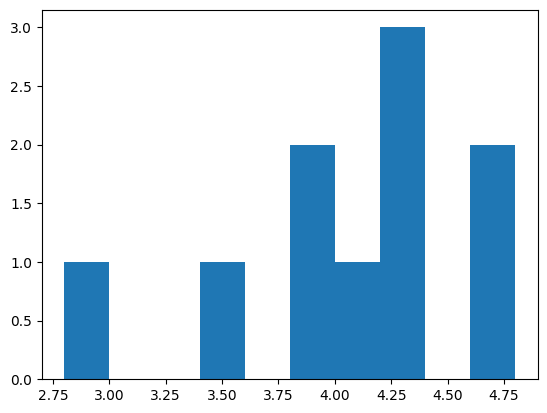

In [16]:
# rolling a dice 5 times 10 times
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
for i in range(10):
    sample = np.random.randint(1, 7, size=5)
    sample_means.append(np.mean(sample))
print(sample_means)

# plot sample means
# sampling distribution of sample means
plt.hist(sample_means)
plt.show()

[2.6, 3.0, 4.2, 2.6, 3.6, 3.4, 2.4, 3.6, 4.2, 3.4, 3.0, 4.0, 4.8, 2.2, 5.0, 2.6, 3.0, 3.8, 3.8, 4.4, 3.8, 3.2, 3.2, 4.0, 4.6, 2.6, 4.2, 3.2, 4.0, 3.2, 2.8, 3.6, 4.8, 3.6, 3.4, 2.6, 2.6, 3.4, 3.8, 4.0, 4.2, 3.4, 3.4, 3.0, 2.2, 3.2, 5.6, 3.0, 3.0, 3.2, 2.4, 4.8, 4.0, 3.0, 3.2, 3.8, 3.4, 4.4, 3.4, 4.2, 4.0, 4.0, 4.2, 3.6, 4.4, 2.8, 4.0, 2.6, 3.2, 3.6, 4.4, 2.2, 2.6, 2.6, 2.8, 2.2, 4.6, 3.0, 3.0, 4.0, 3.4, 2.8, 2.6, 3.2, 2.4, 2.6, 3.4, 3.4, 3.6, 3.4, 3.6, 3.2, 4.6, 2.8, 2.2, 2.6, 3.6, 4.0, 3.4, 3.6]


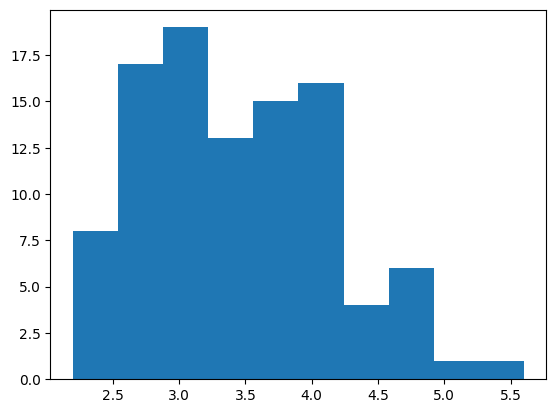

In [20]:
# 100 sample means
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
for i in range(100):
    sample = np.random.randint(1, 7, size=5)
    sample_means.append(np.mean(sample))
print(sample_means)

# plot sample means
# sampling distribution of sample means
plt.hist(sample_means)
plt.show()

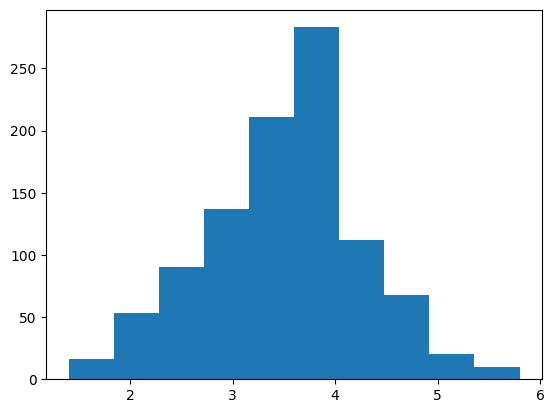

In [21]:
# 1000 sample means
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
for i in range(1000):
    sample = np.random.randint(1, 7, size=5)
    sample_means.append(np.mean(sample))
#print(sample_means)

# plot sample means
# sampling distribution of sample means
plt.hist(sample_means)
plt.show()


In [ ]:
# example

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
#print(sample_means)
  
  # Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [ ]:
# mean of means
# estimating population mean from several random samples

# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))


### Poisson 

* Poisson process - events appear to happen at a certain rate but completely at random
* Examples:
  * number of animals adopted from an animal shelter per week
  * number of people arriving at a restaurant per hour
  * number of earthquakes in cali per year
* Time unit is irrelevant - use same unit for same situation
* Poisson distribution - probability of some # of events occurring over a fixed period of time
* Lambda = average number of events per time interval
  * average number of adoptions per week = 8
* Distribution peak always at Lambda value
  
* probability of a single value P(# adoptions in a week =5) given average number of adoptions per week is 8: 

`from scipy.stats import poisson`
`poisson.pmf(5, 8)`

* probability of a of less than or equal to - what is P(#adoptions in a week <=5), if average is 8: 

`from scipy.stats import poisson`
`poisson.cdf(5, 8)`

* probability of a of greater than - what is P(#adoptions in a week >5), if average is 8: 

`from scipy.stats import poisson`
`1-poisson.cdf(5, 8)`

**sampling from Poisson**

`from scipy.stats import poisson`
`poisson.rvs(8, size=10)`

### others

**exponential**

* probability of time between Poisson events
* eg.
  * probability of > 1 day between adoptions
  * probability of < 10 minutes between restaurant arrivals
  * probability of 6-8 months between earthquakes
* also uses lambda (rate) - expected value of exponential distribution
  * 1/lambda
* continuous (time) 

`from scipy.stats import expon`
`scale = 1/lambda` e.g 1/0.5 
# P(wait<1 min)
`expon.cdf(1, scale=2)`

# P(wait>4min) =
`1-expon.cdf(4, scale=2)`

# P(1 min < wait < 4 min)
`expon.cdf(4, scale=2) - expon.cdf(1, scale=2)`


**(student's) t-distribution**

* similar to normal distribution shape
* thicker tails - observations more likely to fall further from mean
* has parameter degrees of freedom (df) which affects thickness of tails
  * lower df = thicker tails, higher sd
  * higher df closer to normal distribution


**log-normal distribution**

* variable whose logarithm is normally distributed
* examples:
  * length of chess games
  * adult blood pressures
  * 

## 4 Correlation and Experimental Design

* correlation coefficient - -1 to 1
* `sns.scatterplot(x='independent', y='dependent', data=df)`
* `sns.lmplot((x='independent', y='dependent', data=df, ci=None)` 
* `df['col'].corr(df['col2'])`

### caveats

* needs linearity to be valide
* skewed data can be log-transformed
* other transformations
  * `np.log(x)`
  * `sqrt(x)`
  * `1/x` (reciprocal)
  * combinations:
    * `log(x)` and `log(y)`
    * `sqrt(x)` and `1/y`

* correlation does not imply causation
* confounding (hidden variables which are correlated to two variables - it counfounds)

### experiment design

* experiment aims to answer: `what is the effect of the treatment on the response`
  * treatment: explanatory/independent variable
  * response: response/dependent variable

**controlled experiment**
* participants assigned to either treatment group or control goup
  * treatment group sees new drug/advert/etc.
  * control group does not
* groups should be comparable so that causation can be inferred
* if groups are not comparable, it can lead to confounding (bias)


**gold standard**
* randomised control trial
  * participants assigned to treatment/control randomly, not based on any other characteristics
  * choosing randomly helps ensure groups are comparable
* placebo
  * resembles treatment but has no effect
  * participants will not know which group they are in
  * in clinical trials, sugar pills used
* double-blind trial
  * person administering treatment/running study does not know if placebo or real
  * prevents bias in response/analysis

**fewer opportunities for bias = more reliable conclusion about causation**

### observational study

* participants are not assigned randomly to groups
  * participants assign themselves, usually based on pre-existing characteristics
* many research questions are not conducive to a controlled experiment
  * can't force a disease or people to smoke
  * can't change past behaviour
* cannot establish causation, only association
  * effects can be confounded by factors that got certain people into control or treatment groups
  * ways to control for confounders to strengthen results

### longitudinal v cross sectional

* longitudinal
  * participants followed over a period of time to examine effect of treatment on response
  * effect of age on height is not confounded by generation
  * more expensive, results take longer

* cross-sectional
  * data on participants is collected from a single snapsot in time
  * effect of age on height is confounded by generation
  * cheaper, faster, more convenient